<a href="https://colab.research.google.com/github/Ankushsaini90/cars_price-predictions-/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install klib

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import klib
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path='/content/Cardetails (1).csv'
data=pd.read_csv(file_path)

In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
#Checking shape of data.
print("Rows - ", data.shape[0])
print("Columns - ", data.shape[1])

Rows -  8128
Columns -  13


In [ ]:
# null values
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# drop torque as is not useful for us

In [ ]:
data = data.drop("torque",axis = 1)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
data = data.dropna()

In [ ]:
data.shape

(7907, 12)

In [ ]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


now we dont have any null values

In [ ]:
data.duplicated().sum()

1189

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

now we dont have any duplicate values

In [ ]:
print("Rows - ",data.shape[0])
print("Columns - ",data.shape[1])

Rows -  6718
Columns -  12


In [ ]:
# duplicate values
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()

In [ ]:
print("Rows : ",data.shape[0])
print("Columns - ",data.shape[1])

Rows :  6718
Columns -  12


now we dont have any null or duplicates values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [ ]:
data.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,6718,1983,Maruti Swift Dzire VDI,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6718.0,NaN,NaN,NaN,2013.60911,3.900648,1994.0,2011.0,2014.0,2017.0,2020.0
selling_price,6718.0,NaN,NaN,NaN,526319.550759,523539.802623,29999.0,250000.0,420000.0,650000.0,10000000.0
km_driven,6718.0,NaN,NaN,NaN,73402.29741,58699.802605,1.0,38000.0,68221.5,100000.0,2360457.0
fuel,6718,4,Diesel,3658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,6718,3,Individual,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,6718,2,Manual,6143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,6718,5,First Owner,4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,6718,393,18.9 kmpl,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,6718,121,1248 CC,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='seats', ylabel='Density'>

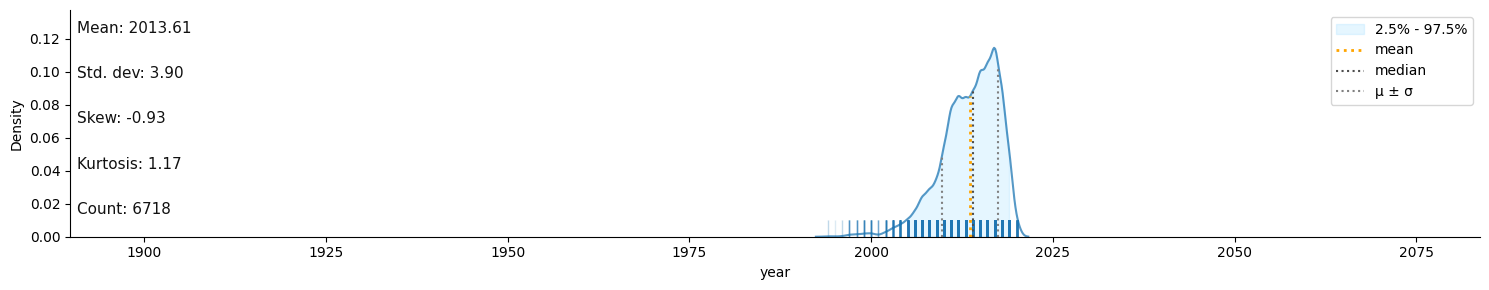

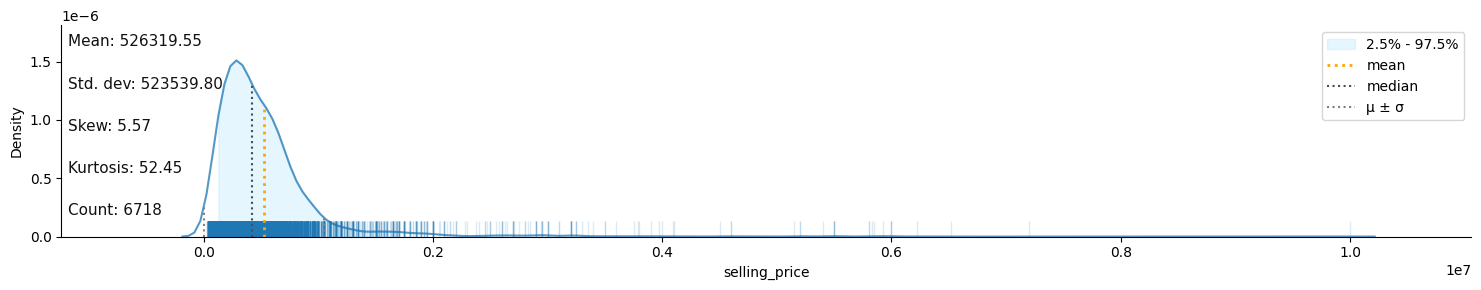

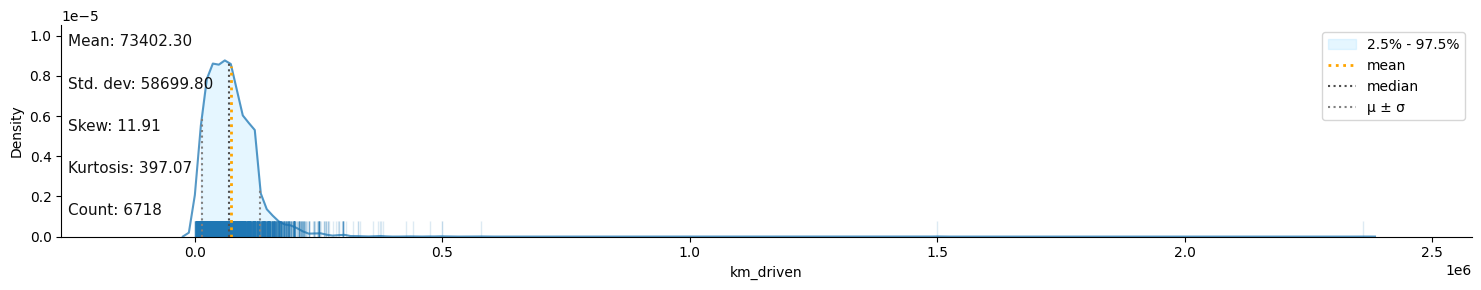

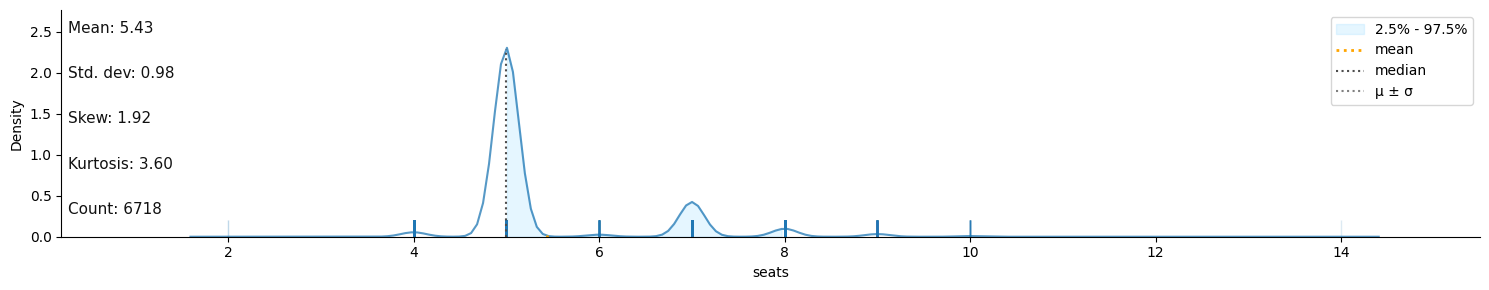

In [ ]:
# distribution plot
klib.dist_plot(data)

# EDA

## 1.Name

In [ ]:
data["name"]

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII
...,...
8121,Maruti Wagon R VXI BS IV with ABS
8122,Hyundai i20 Magna 1.4 CRDi
8123,Hyundai i20 Magna
8124,Hyundai Verna CRDi SX


In [ ]:
data["name"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

we need to seprate brand name from the data["name"]

In [ ]:
# function to remove first word
def first_word(name):
  return name.split(" ")[0]

# print(first_word("Hyundai i20 Sportz Diesel"))

In [ ]:
# apply this function to dataset
data["brand_name"] = data["name"].apply(first_word)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [ ]:
len(data["brand_name"].unique())

31

In [ ]:
# data = data.drop("brand_name",axis = 1)

In [ ]:
# so we have total 31 different brands in our dataset

In [ ]:
# now lets see brands with selling price
# data.groupby("brand_name")["selling_price"].max().sort_values(ascending=False)

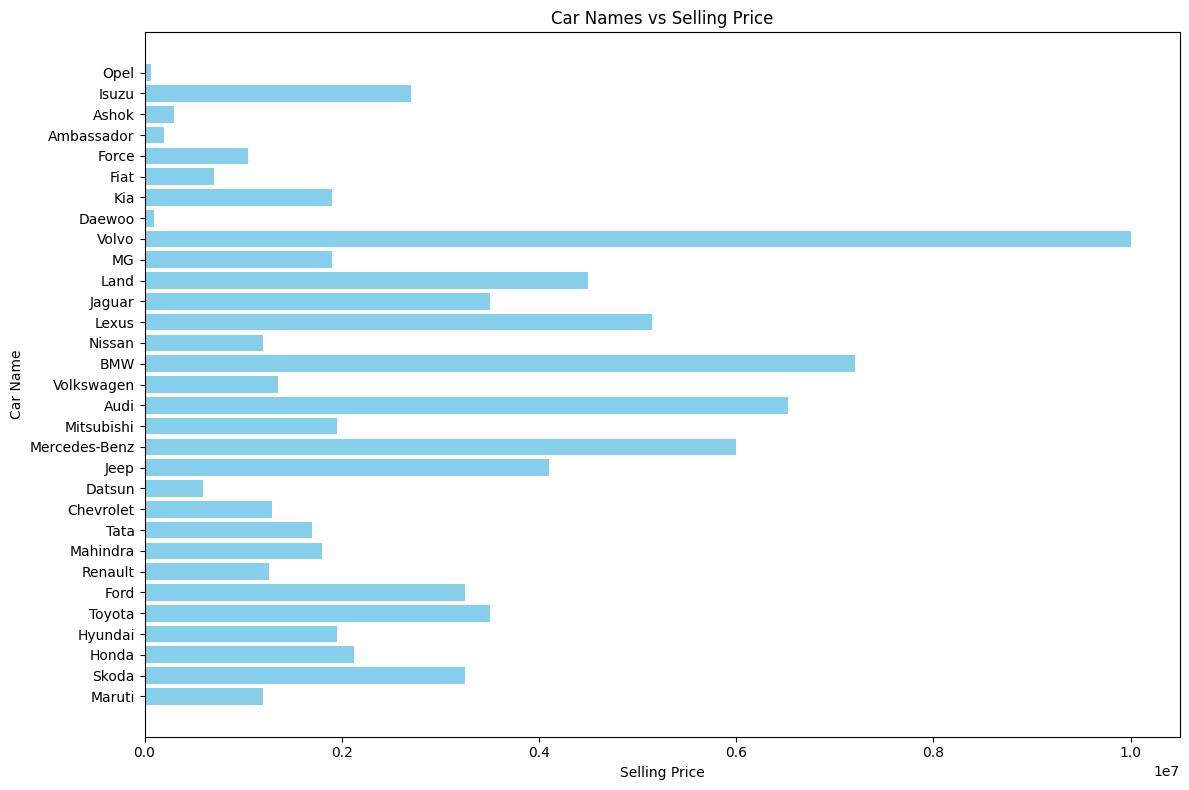

In [ ]:
# Plotting the chart

plt.figure(figsize=(12, 8))
plt.barh(data['brand_name'], data['selling_price'], color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Car Name')
plt.title('Car Names vs Selling Price')
plt.tight_layout()
plt.show()

## 2. km_driven


In [ ]:
data["km_driven"].unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   40000,   70000,   53000,
         80000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,    7500,   19000,   41000,   39000,   22000,
         47000,   72200,   49900,    9000,   11000,   95000,   18000,
         46100,   16000,    9654,   24300,   42163,    8000,   71000,
          9500,   36600,   14000,  120600,   86000,    7800,   31377,
         75000,   93

In [ ]:
# their is noting much to analyze this column

In [ ]:
correlation = data['km_driven'].corr(data['selling_price'])
print(f'Correlation: {correlation}')

Correlation: -0.16131115128040227


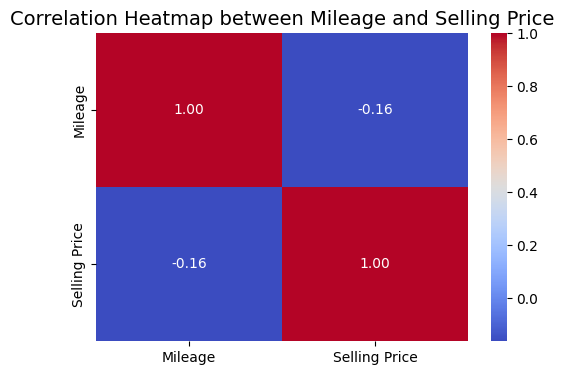

In [ ]:
# Create a correlation matrix for just the two variables
correlation_matrix = np.array([[1, correlation], [correlation, 1]])

# Set up the figure and the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=['Mileage', 'Selling Price'], yticklabels=['Mileage', 'Selling Price'])

plt.title('Correlation Heatmap between Mileage and Selling Price', fontsize=14)
plt.show()

Cars with more kilometers driven tend to have slightly lower prices, but this is not a strict rule. Many other factors might have a much larger impact on the selling price.


## 3.fuel

In [ ]:
data["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
data["fuel"].value_counts()

,count
fuel,
Diesel,3658
Petrol,2973
CNG,52
LPG,35


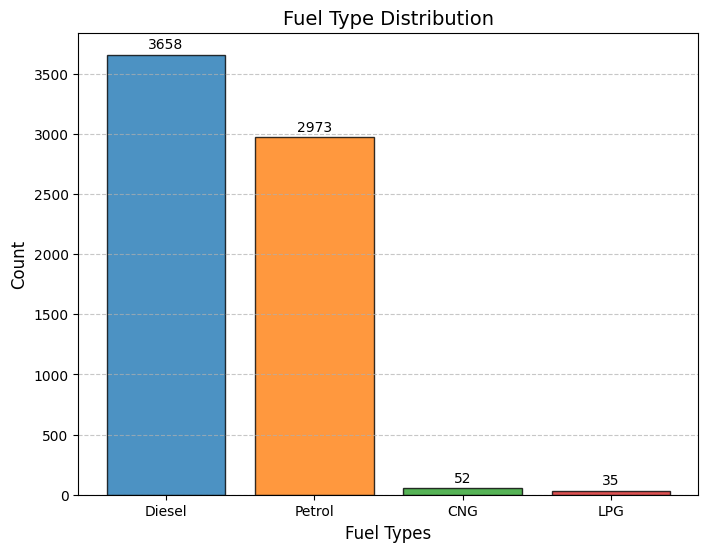

In [ ]:
fuel_types = ['Diesel', 'Petrol', 'CNG', 'LPG']
counts = [3658, 2973, 52, 35]

# Create a more visually appealing bar chart
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette
plt.bar(fuel_types, counts, color=colors, alpha=0.8, edgecolor='black')
plt.xlabel('Fuel Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Fuel Type Distribution', fontsize=14)

# Annotate each bar with the count
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

so we have 4 differests types of fuel.
we have mostly diesel cars following by petrol cars
  

## 4. year

In [ ]:
data["year"].value_counts()

,count
year,
2017,802
2016,691
2015,680
2018,607
2014,580
2012,576
2013,560
2011,535
2010,361


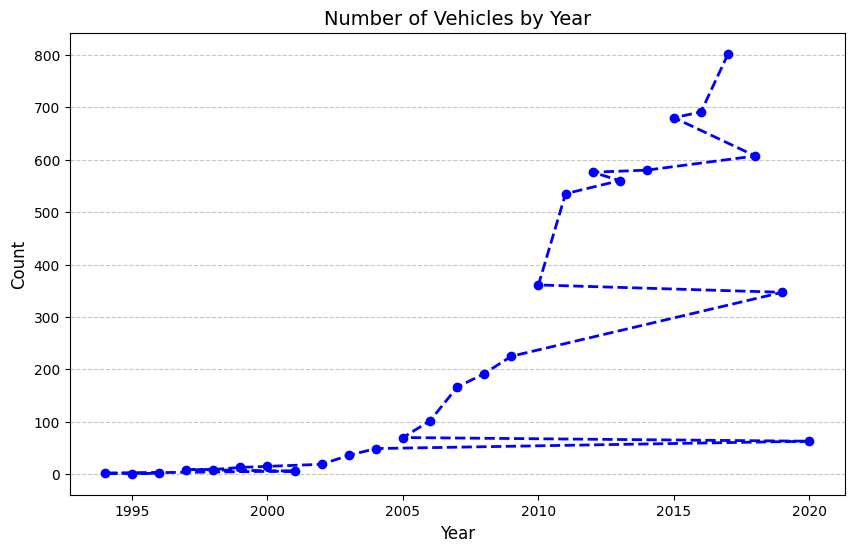

In [ ]:
# Data for the line chart
years = [
    2017, 2016, 2015, 2018, 2014, 2012, 2013, 2011, 2010, 2019,
    2009, 2008, 2007, 2006, 2005, 2020, 2004, 2003, 2002, 2000,
    1999, 1998, 1997, 2001, 1994, 1996, 1995]
counts = [802, 691, 680, 607, 580, 576, 560, 535, 361, 347, 225, 192,
          166, 102, 70, 63, 49, 36, 19, 15, 13, 9, 9, 6, 2, 2, 1]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='--', color='blue', linewidth=2, markersize=6)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Vehicles by Year', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
correlation = data['year'].corr(data['selling_price'])
print(f'Correlation: {correlation}')

Correlation: 0.4273673279559357


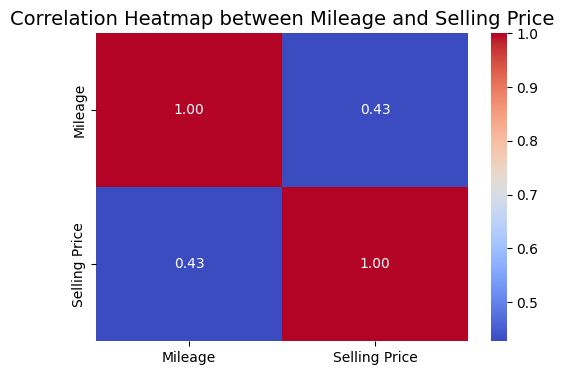

In [ ]:
# Create a correlation matrix for just the two variables
correlation_matrix = np.array([[1, correlation], [correlation, 1]])

# Set up the figure and the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=['Mileage', 'Selling Price'], yticklabels=['Mileage', 'Selling Price'])

plt.title('Correlation Heatmap between Mileage and Selling Price', fontsize=14)
plt.show()

we have highest car model from 2017 and oldest car model is of 1995


Newer cars (higher year) generally have higher selling prices. This aligns with expectations, as newer vehicles tend to have less wear and tear, better features, and higher demand.

## 5. seller_type

In [ ]:
data["seller_type"].value_counts()

,count
seller_type,
Individual,6025
Dealer,666
Trustmark Dealer,27


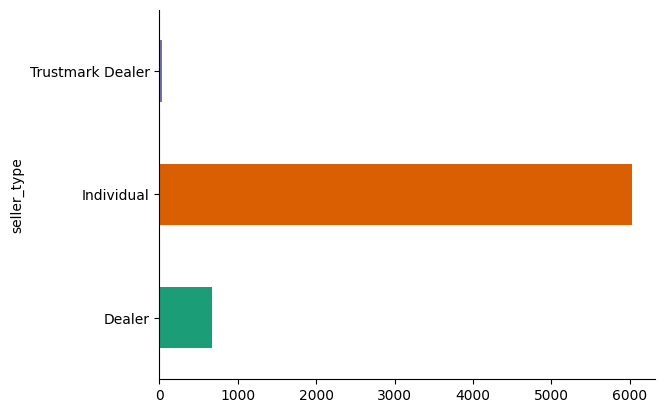

In [ ]:
# bar chart for seller type
data.groupby('seller_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 6. transmission

In [ ]:
data["transmission"].value_counts()

,count
transmission,
Manual,6143
Automatic,575


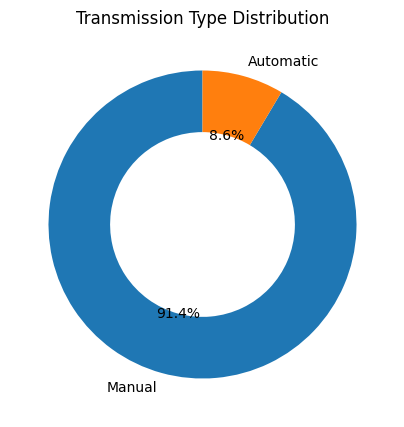

In [ ]:
# Create a donut chart

transmission_types = ['Manual', 'Automatic']
counts = [6143, 575]

plt.figure(figsize=(5, 5))
plt.pie(counts, labels=transmission_types, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}, colors=['#1f77b4', '#ff7f0e'])
plt.title('Transmission Type Distribution')
plt.show()

## 7. owner

In [ ]:
data["owner"].value_counts()

,count
owner,
First Owner,4176
Second Owner,1889
Third Owner,493
Fourth & Above Owner,155
Test Drive Car,5


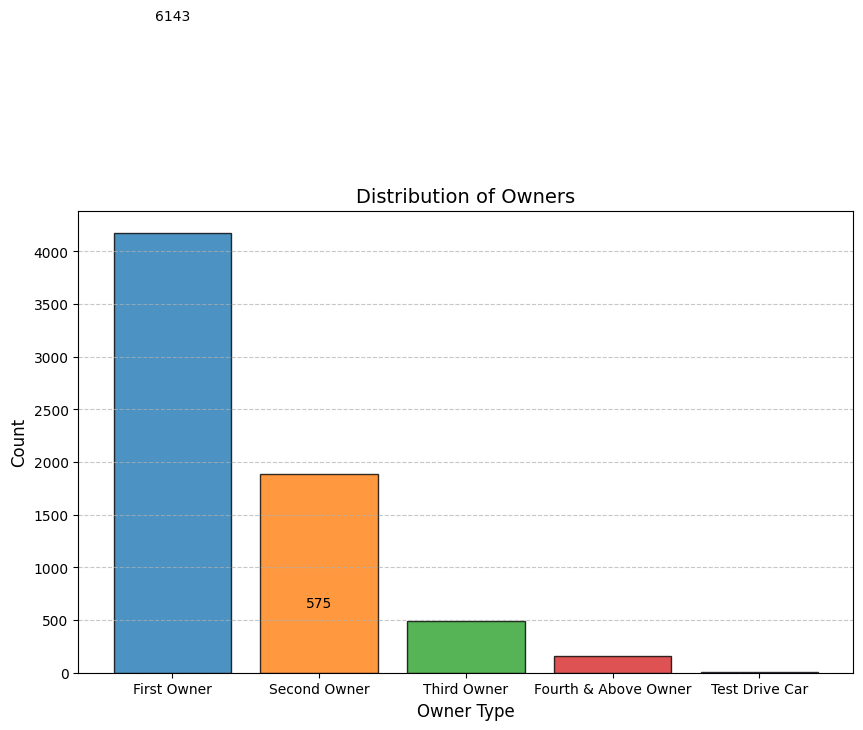

In [ ]:
owner = ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"]
count = [4176,1889,493,155,5]

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Custom colors
plt.bar(owner, count, color=colors, alpha=0.8, edgecolor='black')

# Add labels and title
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Owners', fontsize=14)

# Annotate each bar with the count
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10, color='black')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the chart
plt.show()

so we have total 5 differnt types of owner

## 8. mileage

In [ ]:
def clean_data(val):
    val = val.split(" ")[0]
    val = val.strip()
    if val == " ":
      val = 0
    return val

In [ ]:
mileage = data["mileage"].apply(clean_data)

In [ ]:
mileage

,mileage
0,23.4
1,21.14
2,17.7
3,23.0
4,16.1
...,...
8121,18.9
8122,22.54
8123,18.5
8124,16.8


In [ ]:
correlation = mileage.corr(data['selling_price'])
print(f'Correlation: {correlation}')

Correlation: -0.1083442553985583


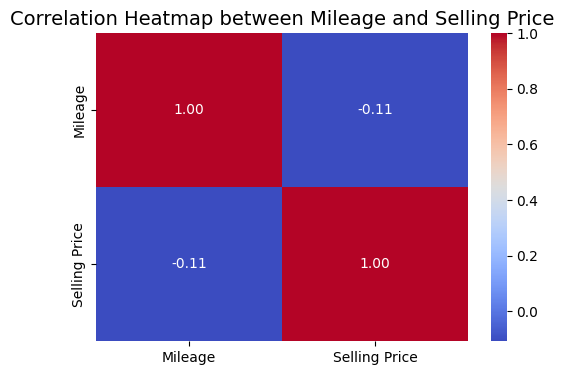

In [ ]:
# Create a correlation matrix for just the two variables
correlation_matrix = np.array([[1, correlation], [correlation, 1]])

# Set up the figure and the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=['Mileage', 'Selling Price'], yticklabels=['Mileage', 'Selling Price'])

plt.title('Correlation Heatmap between Mileage and Selling Price', fontsize=14)
plt.show()

## 9. engine

In [ ]:
data["engine"].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [ ]:
engine = data["engine"].apply(clean_data)

In [ ]:
engine

,engine
0,1248
1,1498
2,1497
3,1396
4,1298
...,...
8121,998
8122,1396
8123,1197
8124,1493


In [ ]:
correlation = engine.corr(data['selling_price'])
print(f'Correlation: {correlation}')

Correlation: 0.44285658402804895


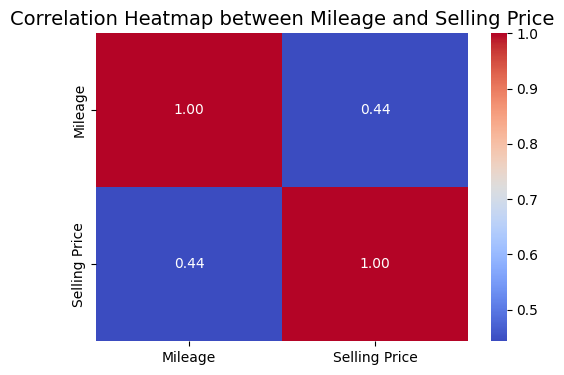

In [ ]:
# Create a correlation matrix for just the two variables
correlation_matrix = np.array([[1, correlation], [correlation, 1]])

# Set up the figure and the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=['Mileage', 'Selling Price'], yticklabels=['Mileage', 'Selling Price'])

plt.title('Correlation Heatmap between Mileage and Selling Price', fontsize=14)
plt.show()

## 10. max_power

In [ ]:
data["max_power"].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [ ]:
max_power = data["max_power"].apply(clean_data)

In [ ]:
max_power

,max_power
0,74
1,103.52
2,78
3,90
4,88.2
...,...
8121,67.1
8122,88.73
8123,82.85
8124,110


## 11 . seats

In [ ]:
seats = data["seats"].apply(lambda x : int(x))

In [ ]:
seats.value_counts()

,count
seats,
5,5254
7,966
8,222
4,124
9,74
6,57
10,18
2,2
14,1


In [ ]:
# Filter the cars with 14 seats
cars_with_14_seats = data[data['seats']==14]
cars_with_2_seats = data[data['seats']==2]

In [ ]:
cars_with_2_seats

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name
5900,Mahindra Bolero Pik-Up FB 1.7T,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,2.0,Mahindra
6629,Mahindra Bolero Pik-Up CBC 1.7T,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,2.0,Mahindra


In [ ]:
cars_with_14_seats

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,14.0,Tata


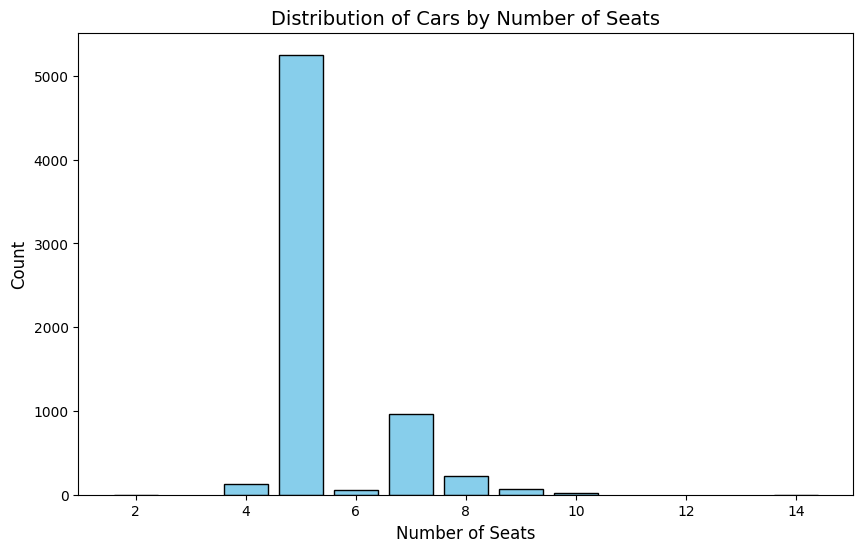

In [ ]:
seats = [5, 7, 8, 4, 9, 6, 10, 2, 14]
count = [5254, 966, 222, 124, 74, 57, 18, 2, 1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(seats, count, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Seats', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Cars by Number of Seats', fontsize=14)

# Show the chart
plt.show()